# Combinatorial library properties

## Aim of this notebook

In this notebook we want to analyze properties of the combinatorial library, such as the ligand size and Lipinski's rule of five criteria.

## Table of contents

1. Combinatorial library data
2. Recombined ligand size
3. Lipinski's rule of five

In [1]:
from pathlib import Path

import ijson
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
PATH_COMBINATORIAL_LIBRARY = Path('../data/combinatorial_library/combinatorial_library.json')

## 1. Combinatorial library data

The combinatorial library comes as large JSON file. In order to access/filter ligands efficiently (time and memory), we use the `ijson` library:

> Ijson is an iterative JSON parser with standard Python iterator interfaces.

https://pypi.org/project/ijson/

Here, we take a look at the first entry in the combinatorial library:

In [3]:
# open file
f = open(PATH_COMBINATORIAL_LIBRARY, 'rb')

# yield native Python objects out of a JSON stream located under a prefix
objects = ijson.items(f, 'item')

next(objects)

{'bond_ids': [['SE_13', 'AP_7']],
 'fragment_ids': ['SE_4', 'AP_2'],
 'hba': 1,
 'hbd': 1,
 'mwt': 1,
 'logp': 1,
 'n_atoms': 20,
 'chembl_exact': [],
 'chembl_most_similar': ['CHEMBL405398', Decimal('0.35')],
 'original_exact': [],
 'original_substructure': [],
 'inchi': 'InChI=1S/C15H21N5/c1-12-11-15(18-17-12)16-13-3-5-14(6-4-13)20-9-7-19(2)8-10-20/h3-6,11H,7-10H2,1-2H3,(H2,16,17,18)'}

The combinatorial library contains the following information:
- `bond_ids` and `fragment_ids`: 
  - Bond IDs (`bond_ids`), e.g. `[["FP_6", "AP_10"], ["AP_11", "SE_13"]]`: Atom (`<subpocket>_<atom ID>`) pairs per fragment bond
  - Fragment IDs (`fragment_ids`), e.g. `["SE_2", "AP_0", "FP_2"]` (`<subpocket>_<fragment index in subpocket pool>`)
  - With this information it is possible to construct the recombined ligand from the fragment library
- `hba`, `hbd`, `mwt`, and `logp`: Ligand fulfills Lipinski's rule of five criteria? (`0` or `1`)
  - Number of hydrogen bond acceptors (`hba`) <= 10
  - Number of hydrogen bond donors (`hbd`) <= 5
  - Molecular weight (`mwt`) <= 500
  - LogP value (`logp`) <= 5 
- `n_atoms`: Number of heavy atoms
- `chembl_exact`: Ligand has exact match in ChEMBL? List of ChEMBL molecule indicies (`[]` if no match)
- `chembl_most_similar`: Most similar molecule in ChEMBL, e.g. `[500021, 0.34]` (`[<ChEMBL ID without "CHEMBL" prefix>, <Tanimoto similarity>]` 
- `original_exact`: Ligand has exact match in original ligands? List of original ligand indicies (`[]` if no match)
- `original_substructure`: Ligand is substructure of original ligands? List of original ligand indicies (`[]` if no match)
- `inchi`: InChI 

## 2. Recombined ligand size

In [4]:
def ligand_sizes(path_json):
    
    # get object generator from json
    f = open(path_json, 'rb')
    objects = ijson.items(f, 'item')

    # filter objects
    n_atoms_list = [o['n_atoms'] for o in objects]
    
    return n_atoms_list

In [5]:
ligand_size_list = ligand_sizes(PATH_COMBINATORIAL_LIBRARY)

(array([ 4.,  6.,  4.,  4.,  4.,  8., 10., 12.,  8.,  4.]),
 array([15. , 17.7, 20.4, 23.1, 25.8, 28.5, 31.2, 33.9, 36.6, 39.3, 42. ]),
 <a list of 10 Patch objects>)

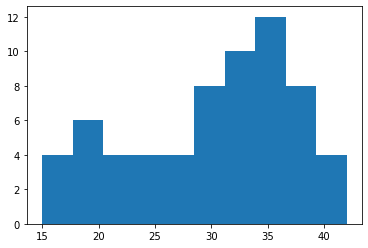

In [6]:
plt.hist(ligand_size_list)

## 3. Lipinski's rule of five

In [7]:
def n_ligand_fulfilled_criteria(path_json, criteria):

    # get object generator from json
    f = open(path_json, 'rb')
    objects = ijson.items(f, 'item')

    # filter objects
    objects_filtered = (o for o in objects if o[criteria] == 1)
    
    return len(list(objects_filtered))

In [8]:
n_hba = n_ligand_fulfilled_criteria(PATH_COMBINATORIAL_LIBRARY, 'hba')
n_hbd = n_ligand_fulfilled_criteria(PATH_COMBINATORIAL_LIBRARY, 'hbd')
n_mwt = n_ligand_fulfilled_criteria(PATH_COMBINATORIAL_LIBRARY, 'mwt')
n_logp = n_ligand_fulfilled_criteria(PATH_COMBINATORIAL_LIBRARY, 'logp')

In [9]:
def n_ligand_fulfilled_lipinski(path_json):

    # get object generator from json
    f = open(path_json, 'rb')
    objects = ijson.items(f, 'item')
        
    # filter objects
    objects_filtered = (o for o in objects if o['hba']+o['hbd']+o['mwt']+o['logp'] >= 3)

    return len(list(objects_filtered))

In [10]:
n_lipinski = n_ligand_fulfilled_lipinski(PATH_COMBINATORIAL_LIBRARY)

In [11]:
print(n_hba, n_hbd, n_mwt, n_logp, n_lipinski)

60 64 50 64 60
